In [ ]:
import pandas as pd
import os, sys

# Filter all positive images out

In [ ]:
# Get all positive #1 (活动性出血) images -- 429 total images

In [ ]:
import os, sys, glob
pos_ind_df = pd.read_excel(r'C:\Users\wiqwe\Desktop\上交科研\c活动性出血.xlsx')
pos_ind_df.columns
name_ind = pos_ind_df[[' 姓名','出血典型病变图片号码']]

In [ ]:
# traverse all positive image folders
import re
folder_prefix = r'C:\Users\wiqwe\Desktop\上交科研\出血'
folders = glob.glob(os.path.join(folder_prefix,'*'))
# print(folders)
name_to_folder = {}

def name_extract(folder):
    pattern = re.compile('\d{6,10}(.+)')
    name = pattern.findall(folder)
    name_to_folder[name[0]] = folder
    return name

names = [name_extract(i) for i in folders]

In [ ]:
# Copy selected images from patient's folder to dataset folder
import shutil
pos_img_index = 0
POSITIVE_IMGS_FOLDER = r'C:\Users\wiqwe\Desktop\上交科研\selected_positive_#1_imgs'
def func(a):
    name, img_inds = a.tolist()
    if name.endswith('2'): name = name[:-1]
#     print(name, img_inds,'|', type(img_inds), len(img_inds), 'called')
    img_inds = img_inds.replace(' ', '').replace('，', ',').strip(',').replace('.',',').split(',')
    name = name.strip()
#     print(type(img_inds), img_inds)
    
    def copy_file_func(img_ind):
        global pos_img_index
        full_path = os.path.join(name_to_folder[name], img_ind + '.jpg')
        print(full_path)
        paste_path = os.path.join(POSITIVE_IMGS_FOLDER, str(pos_img_index) + '.jpg')
        shutil.copyfile(full_path,paste_path)
        pos_img_index += 1
   
    _ = [copy_file_func(i) for i in img_inds]
#     print(name, img_inds)
    
_ = name_ind.apply(func, axis=1, raw=True)

In [ ]:
# Get all positive #2 (血管畸形) images -- 1169 total images
pos_ind_df = pd.read_excel(r'C:\Users\wiqwe\Desktop\上交科研\消化道出血病人表-血管畸形80.xlsx', dtype=str)
pos_ind_df.columns
name_ind = pos_ind_df[[' 姓名','病变图片编号']]

In [ ]:
# Copy selected images from patient's folder to dataset folder
import shutil
pos_img_index = 429
POSITIVE_IMGS_FOLDER = r'C:\Users\wiqwe\Desktop\上交科研\selected_positive_#2_imgs'
def func(a):
    name, img_inds = a.tolist()
    if type(img_inds) != str: return
    print(name, img_inds, type(img_inds))
    img_inds = img_inds.replace(' ', '').replace('，', ',').strip(',').replace('.',',').split(',')
    name = name.strip()
    print(type(img_inds), img_inds)
    
    def copy_file_func(img_ind):
        global pos_img_index
        full_path = os.path.join(name_to_folder[name], img_ind + '.jpg')
        print(full_path)
        paste_path = os.path.join(POSITIVE_IMGS_FOLDER, str(pos_img_index) + '.jpg')
        shutil.copyfile(full_path,paste_path)
        pos_img_index += 1
   
    _ = [copy_file_func(i) for i in img_inds]
#     print(name, img_inds)
    
_ = name_ind.apply(func, axis=1, raw=True)

# Sample negative images

In [5]:
# Get negative images -- 454 * num_per_folder
import random
import glob, os, shutil
NEGATIVE_IMGS_FOLDER = r'C:\Users\wiqwe\Desktop\上交科研\selected_negative_imgs'
folder_prefix = r'C:\Users\wiqwe\Desktop\上交科研\阴性'
neg_img_index = 0
num_per_folder = 5
folders = glob.glob(os.path.join(folder_prefix,'*'))
def copy_neg_image(image):
    global neg_img_index
    image_basename = os.path.basename(image)
    paste_path = os.path.join(NEGATIVE_IMGS_FOLDER, str(neg_img_index) + '.jpg')
    neg_img_index += 1
#     print(image)
    shutil.copyfile(image,paste_path)
    
for folder in folders:
    images = glob.glob(os.path.join(folder, '*'))
    if not images:
        continue
    elif len(images) > num_per_folder:
        images = random.sample(images, num_per_folder)
    for image in images:
        copy_neg_image(image)


# Train and validation split

In [5]:
import random
# split train and validation set (copy files to different folder)
POSITIVE_1_IMGS_FOLDER = r'C:\Users\wiqwe\Desktop\上交科研\selected_positive_#1_imgs'
POSITIVE_1_IMGS_TRAIN_FOLDER = r'C:\Users\wiqwe\Desktop\上交科研\selected_positive_#1_imgs_train'
POSITIVE_1_IMGS_VALIDATION_FOLDER = r'C:\Users\wiqwe\Desktop\上交科研\selected_positive_#1_imgs_validation'
POSITIVE_2_IMGS_FOLDER = r'C:\Users\wiqwe\Desktop\上交科研\selected_positive_#2_imgs'
POSITIVE_2_IMGS_TRAIN_FOLDER = r'C:\Users\wiqwe\Desktop\上交科研\selected_positive_#2_imgs_train'
POSITIVE_2_IMGS_VALIDATION_FOLDER = r'C:\Users\wiqwe\Desktop\上交科研\selected_positive_#2_imgs_validation'
NEGATIVE_IMGS_FOLDER = r'C:\Users\wiqwe\Desktop\上交科研\selected_negative_imgs'
NEGATIVE_IMGS_TRAIN_FOLDER = r'C:\Users\wiqwe\Desktop\上交科研\selected_negative_imgs_train'
NEGATIVE_IMGS_VALIDATION_FOLDER = r'C:\Users\wiqwe\Desktop\上交科研\selected_negative_imgs_validation'
VALIDATION_RATIO = 0.15

# split randomly
positive_1_imgs = glob.glob(os.path.join(POSITIVE_1_IMGS_FOLDER,'*'))
positive_1_validation_indices = random.sample(list(range(429)), int(VALIDATION_RATIO*429))
positive_1_train_indices = list(filter(lambda x: x not in positive_1_validation_indices, list(range(429))))
print(len(positive_1_train_indices), len(positive_1_validation_indices))

positive_2_imgs = glob.glob(os.path.join(POSITIVE_1_IMGS_FOLDER,'*'))
positive_2_validation_indices = random.sample(list(range(429, 1600)), int(VALIDATION_RATIO*1169))
positive_2_train_indices = list(filter(lambda x: x not in positive_2_validation_indices, list(range(429, 1600))))
print(len(positive_2_train_indices), len(positive_2_validation_indices))

negative_imgs = glob.glob(os.path.join(POSITIVE_1_IMGS_FOLDER,'*'))
negative_validation_indices = random.sample(list(range(429)), int(VALIDATION_RATIO*2084))
negative_train_indices = list(filter(lambda x: x not in negative_validation_indices, list(range(2084))))
print(len(negative_train_indices), len(negative_validation_indices))

#TODO: FIVE FOLD CV

# clear folder if already exsits
# folder_collections = [POSITIVE_1_IMGS_TRAIN_FOLDER, \
#                        POSITIVE_1_IMGS_VALIDATION_FOLDER, \
#                        POSITIVE_2_IMGS_TRAIN_FOLDER,
#                        POSITIVE_2_IMGS_VALIDATION_FOLDER, \
#                        NEGATIVE_IMGS_TRAIN_FOLDER, \
#                        NEGATIVE_IMGS_VALIDATION_FOLDER]
# for current_folder in folder_collections:
#     shutil.rmtree(current_folder)
#     os.makedirs(current_folder)

#save and copy
def copy_train_validation_image(image_index, source_image_folder, des_image_folder):
    source_path = os.path.join(source_image_folder, str(image_index) + '.jpg')
    paste_path = os.path.join(des_image_folder, str(image_index) + '.jpg')
#     print(image)
    shutil.copyfile(source_path, paste_path)
    
for i in positive_1_train_indices:
    copy_train_validation_image(i, POSITIVE_1_IMGS_FOLDER, POSITIVE_1_IMGS_TRAIN_FOLDER)
for i in positive_1_validation_indices:
    copy_train_validation_image(i, POSITIVE_1_IMGS_FOLDER, POSITIVE_1_IMGS_VALIDATION_FOLDER)
for i in positive_2_train_indices:
    copy_train_validation_image(i, POSITIVE_2_IMGS_FOLDER, POSITIVE_2_IMGS_TRAIN_FOLDER)
for i in positive_2_validation_indices:
    copy_train_validation_image(i, POSITIVE_2_IMGS_FOLDER, POSITIVE_2_IMGS_VALIDATION_FOLDER)
for i in negative_train_indices:
    copy_train_validation_image(i, NEGATIVE_IMGS_FOLDER, NEGATIVE_IMGS_TRAIN_FOLDER)
for i in negative_validation_indices:
    copy_train_validation_image(i, NEGATIVE_IMGS_FOLDER, NEGATIVE_IMGS_VALIDATION_FOLDER)

365 64
996 175
1772 312


# image preprocessing pipeline

In [3]:
import numpy as np
import PIL.Image
import glob, os, shutil
POSITIVE_1_IMGS_FOLDER = r'C:\Users\wiqwe\Desktop\上交科研\selected_positive_#1_imgs'
POSITIVE_1_IMGS_TRAIN_FOLDER = r'C:\Users\wiqwe\Desktop\上交科研\selected_positive_#1_imgs_train'
POSITIVE_1_IMGS_VALIDATION_FOLDER = r'C:\Users\wiqwe\Desktop\上交科研\selected_positive_#1_imgs_validation'
POSITIVE_2_IMGS_FOLDER = r'C:\Users\wiqwe\Desktop\上交科研\selected_positive_#2_imgs'
POSITIVE_2_IMGS_TRAIN_FOLDER = r'C:\Users\wiqwe\Desktop\上交科研\selected_positive_#2_imgs_train'
POSITIVE_2_IMGS_VALIDATION_FOLDER = r'C:\Users\wiqwe\Desktop\上交科研\selected_positive_#2_imgs_validation'
NEGATIVE_IMGS_FOLDER = r'C:\Users\wiqwe\Desktop\上交科研\selected_negative_imgs'
NEGATIVE_IMGS_TRAIN_FOLDER = r'C:\Users\wiqwe\Desktop\上交科研\selected_negative_imgs_train'
NEGATIVE_IMGS_VALIDATION_FOLDER = r'C:\Users\wiqwe\Desktop\上交科研\selected_negative_imgs_validation'

train_data = []
train_label = []
validation_data = []
validation_label = []

folder_collections = [POSITIVE_1_IMGS_TRAIN_FOLDER, \
                       POSITIVE_1_IMGS_VALIDATION_FOLDER, \
#                        POSITIVE_2_IMGS_TRAIN_FOLDER,
#                        POSITIVE_2_IMGS_VALIDATION_FOLDER, \
                       NEGATIVE_IMGS_TRAIN_FOLDER, \
                       NEGATIVE_IMGS_VALIDATION_FOLDER]
# Two classes
label_collections = [[0, 1], [0, 1],\
                     [1, 0], [1, 0]]

# # three classes
# label_collections = [[0, 1, 0], [0, 1, 0],\
#                      [0, 0, 1], [0, 0, 1], \
#                      [1, 0, 0], [1, 0, 0]]
    
for folder_index, current_folder in enumerate(folder_collections):
    for img in glob.glob(os.path.join(current_folder ,'*')):
        im = PIL.Image.open(img)
        # im = im.convert('LA')
        im = im.resize((224,224))
        im = np.array(im)
        im = (im / 255.0) - 1.0
    #     im_roll = np.rollaxis(im, 2, 0)
    #     assert (im[:,:,0] == im_roll[0,:,:]).all()
    #     assert (im[:,:,1] == im_roll[1,:,:]).all()
    #     assert (im[:,:,2] == im_roll[2,:,:]).all()
        if 'train' in current_folder:
            train_data.append(np.array(im))
            train_label.append(label_collections[folder_index])
        elif 'validation' in current_folder:
            validation_data.append(np.array(im))
            validation_label.append(label_collections[folder_index])
        else:
            print(current_folder)
            raise TypeError

In [7]:
print(len(train_data), train_data[0].shape, len(train_label))
print(len(validation_data), validation_data[0].shape, len(validation_label))

2137 (224, 224, 3) 2137
376 (224, 224, 3) 376


In [ ]:
recovered_img = ((train_data[0]+1)*255).astype(np.uint8)
print(recovered_img.shape)
PIL.Image.fromarray(recovered_img).show()

In [4]:
# stack the train and validation list to array
train_data = np.stack(train_data, axis=0)
train_label = np.array(train_label)
validation_data = np.stack(validation_data, axis=0)
validation_label = np.array(validation_label)
print(train_data.shape, train_label.shape, validation_data.shape, validation_label.shape)

(2137, 224, 224, 3) (2137, 2) (376, 224, 224, 3) (376, 2)


# Train Resnet 50

In [9]:
import tensorflow as tf
import keras
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
keras.backend.set_session(sess)

In [10]:
resnet_50 = ResnetBuilder.build_resnet_50((3,224,224), 2)

In [11]:
optimizer = keras.optimizers.Adam(lr=0.001, amsgrad=True, decay=0.00005)
resnet_50.compile(optimizer, loss=keras.losses.categorical_crossentropy, metrics=['categorical_accuracy'])

In [ ]:
# callback function to save model every 10 epoch

In [ ]:
# learning rate schedular

In [ ]:
# Parameter searching for resnet 50, train for 100 epoch
# lr -> {0.001, 0.005, 0.0005}
# decay -> {0.00005, 0.0001, 0.0005}
# l2 - > {1e-3}
# sample weight if train on two classes -> {None}

# 0.001, 0.00005, 1e-3, None -> two classes 0.23 96%

In [14]:
resnet_50.fit(train_data, train_label, epochs=50, batch_size=32, validation_data=(validation_data, validation_label))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 2137 samples, validate on 376 samples
Epoch 1/50
2137/2137 [==============================] - 212s 99ms/step - loss: 30.0845 - categorical_accuracy: 0.8723 - val_loss: 22.2446 - val_categorical_accuracy: 0.1702
Epoch 2/50
2137/2137 [==============================] - 30s 14ms/step - loss: 9.2205 - categorical_accuracy: 0.9134 - val_loss: 5.9337 - val_categorical_accuracy: 0.8404
Epoch 3/50
2137/2137 [==============================] - 30s 14ms/step - loss: 4.1844 - categorical_accuracy: 0.9270 - val_loss: 3.2926 - val_categorical_accuracy: 0.8457
Epoch 4/50
2137/2137 [==============================] - 29s 14ms/step - loss: 2.5205 - categorical_accuracy: 0.9448 - val_loss: 2.7488 - val_categorical_accuracy: 0.6782
Epoch 5/50
2137/2137 [==============================] - 30s 14ms/step - loss: 1.7908 - categorical_accuracy: 0.9565 - val_loss: 2.0499 - val_categorical_accuracy: 0.7048
Epoch 

Epoch 47/50
2137/2137 [==============================] - 30s 14ms/step - loss: 0.1845 - categorical_accuracy: 0.9958 - val_loss: 1.9337 - val_categorical_accuracy: 0.2287
Epoch 48/50
2137/2137 [==============================] - 30s 14ms/step - loss: 0.1800 - categorical_accuracy: 0.9963 - val_loss: 0.7755 - val_categorical_accuracy: 0.7633
Epoch 49/50
2137/2137 [==============================] - 30s 14ms/step - loss: 0.2178 - categorical_accuracy: 0.9878 - val_loss: 1.0442 - val_categorical_accuracy: 0.9016
Epoch 50/50
2137/2137 [==============================] - 29s 14ms/step - loss: 0.2060 - categorical_accuracy: 0.9892 - val_loss: 0.5163 - val_categorical_accuracy: 0.8378


In [16]:
weak_optimizer = keras.optimizers.Adam(lr=0.0001, amsgrad=True, decay=0.00005)
resnet_50.compile(weak_optimizer, loss=keras.losses.categorical_crossentropy, metrics=['categorical_accuracy'])
resnet_50.fit(train_data, train_label, epochs=50, batch_size=32, validation_data=(validation_data, validation_label))

Train on 2137 samples, validate on 376 samples
Epoch 1/50
2137/2137 [==============================] - 412s 193ms/step - loss: 0.1487 - categorical_accuracy: 0.9986 - val_loss: 2.4327 - val_categorical_accuracy: 0.1702
Epoch 2/50
2137/2137 [==============================] - 29s 14ms/step - loss: 0.1322 - categorical_accuracy: 0.9995 - val_loss: 3.0938 - val_categorical_accuracy: 0.1702
Epoch 3/50
2137/2137 [==============================] - 29s 14ms/step - loss: 0.1228 - categorical_accuracy: 1.0000 - val_loss: 3.2066 - val_categorical_accuracy: 0.1702
Epoch 4/50
2137/2137 [==============================] - 29s 14ms/step - loss: 0.1175 - categorical_accuracy: 1.0000 - val_loss: 2.8415 - val_categorical_accuracy: 0.1702
Epoch 5/50
2137/2137 [==============================] - 29s 14ms/step - loss: 0.1117 - categorical_accuracy: 1.0000 - val_loss: 2.6338 - val_categorical_accuracy: 0.1702
Epoch 6/50
2137/2137 [==============================] - 29s 14ms/step - loss: 0.1066 - categorical_ac

Epoch 49/50
2137/2137 [==============================] - 30s 14ms/step - loss: 0.1234 - categorical_accuracy: 1.0000 - val_loss: 0.2402 - val_categorical_accuracy: 0.9681
Epoch 50/50
2137/2137 [==============================] - 29s 14ms/step - loss: 0.1113 - categorical_accuracy: 1.0000 - val_loss: 0.2316 - val_categorical_accuracy: 0.9601


In [1]:
#model io
import tensorflow as tf
# resnet_50.save('50ep_001_50ep_0001_0.00005.h5')
resnet_50 = tf.keras.models.load_model('50ep_001_50ep_0001_0.00005.h5', custom_objects=None, compile=True)

Instructions for updating:
`normal` is a deprecated alias for `truncated_normal`


In [5]:
# Show wrong samples and find threshold
prediction = resnet_50.predict(validation_data)
# prediction_threshold = 0.5
for prediction_threshold in [0.5]:
    prediction_result = prediction > prediction_threshold
    wrongly_predicted_image = []
    wrongly_predicted_image_correct_label = []
    wrongly_predicted_image_PS = []
    for i in range(prediction.shape[0]):
        if prediction_result[i,1] != validation_label[i,1]:
            wrongly_predicted_image.append(validation_data[i])
            wrongly_predicted_image_correct_label.append(validation_label[i])
            wrongly_predicted_image_PS.append(prediction[i,:])
    print(prediction_threshold, len(wrongly_predicted_image))

0.5 15


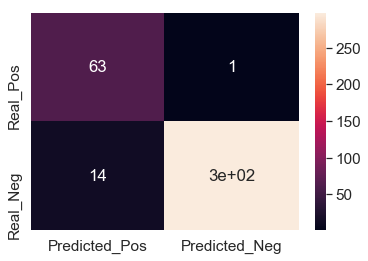

In [21]:
# confusion matrix
import seaborn as sn
import numpy as np

def draw_confusion_matrix(tn, fp, fn, tp):
    cm_df = pd.DataFrame(np.array([[tp, fn], [fp, tn]]), ['Real_Pos', 'Real_Neg'], \
                                                         ['Predicted_Pos', 'Predicted_Neg'])
    sn.set(font_scale=1.4)
    sn.heatmap(cm_df, annot=True)

from sklearn.metrics import confusion_matrix
for prediction_threshold in [0.5]:
    prediction_result = prediction > prediction_threshold
    prediction_col = prediction_result[:,1]
    validation_label_col = validation_label[:,1]
    tn, fp, fn, tp = confusion_matrix(validation_label_col, prediction_col).ravel()
    draw_confusion_matrix(tn, fp, fn, tp)

In [6]:
# sensitivity specificity accuracy
def get_specificity(tn, fp):
    return tn / (tn+fp)

def get_sensitivity(tp, fn):
    return tp / (tp+fn)

def get_accuracy(tp,tn,fp,fn):
    return (tp+tn) / (tp+tn+fn+fp)

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
specificity, sensitivity, accuracy = [], [], [] 
from sklearn.metrics import confusion_matrix
for prediction_threshold in thresholds:
    prediction_result = prediction > prediction_threshold
    prediction_col = prediction_result[:,1]
    validation_label_col = validation_label[:,1]
    tn, fp, fn, tp = confusion_matrix(validation_label_col, prediction_col).ravel()
    specificity.append(get_specificity(tn, fp))
    sensitivity.append(get_sensitivity(tp, fn))
    accuracy.append(get_accuracy(tp,tn,fp,fn))

In [11]:
import pandas as pd
data = {'cnn thresholds':thresholds, 'specificity':specificity, 'sensitivity':sensitivity, 'accuracy':accuracy}
pd.DataFrame(data)

,cnn thresholds,specificity,sensitivity,accuracy
0,0.1,0.935897,1.000000,0.946809
1,0.2,0.945513,1.000000,0.954787
2,0.3,0.948718,1.000000,0.957447
3,0.4,0.951923,1.000000,0.960106
4,0.5,0.955128,0.984375,0.960106
5,0.6,0.958333,0.984375,0.962766
6,0.7,0.961538,0.953125,0.960106
7,0.8,0.964744,0.953125,0.962766
8,0.9,0.964744,0.937500,0.960106


In [67]:
print(list(map(lambda x: x.tolist(), wrongly_predicted_image_PS)))

[[0.590522825717926, 0.40947723388671875], [0.003439075779169798, 0.9965608716011047], [0.04511618986725807, 0.9548837542533875], [0.09575380384922028, 0.9042462110519409], [0.005804746877402067, 0.994195282459259], [0.04147651046514511, 0.9585234522819519], [0.08794502168893814, 0.9120549559593201], [0.38487687706947327, 0.6151231527328491], [0.015596226789057255, 0.9844038486480713], [0.2486422210931778, 0.7513577938079834], [0.06163264811038971, 0.9383673071861267], [0.4147565960884094, 0.5852433443069458], [0.029385380446910858, 0.9706146717071533], [0.04999309405684471, 0.9500069618225098], [0.02438129112124443, 0.9756187200546265]]


In [62]:
# save misclassified images
for index in range(len(wrongly_predicted_image)):
    recovered_img = ((wrongly_predicted_image[index]+1)*255).astype(np.uint8)
    PIL.Image.fromarray(recovered_img).save(r'C:\Users\wiqwe\Desktop\上交科研\misclassfied_images\{}.jpg'.format(index))

In [64]:
# zip files
import os
import zipfile
 
zip_object = zipfile.ZipFile(r'C:\Users\wiqwe\Desktop\上交科研\misclassfied_images.zip', 'w')
 
for folder, subfolders, files in os.walk(r'C:\Users\wiqwe\Desktop\上交科研\misclassfied_images'):
    for file in files:
        zip_object.write(os.path.join(folder, file), os.path.relpath(os.path.join(folder,file), r'C:\Users\wiqwe\Desktop\上交科研\misclassfied_images'), compress_type = zipfile.ZIP_DEFLATED)
 
zip_object.close()

In [47]:
len(wrongly_predicted_image)
def show_image(img):
    recovered_img = ((img+1)*255).astype(np.uint8)
    PIL.Image.fromarray(recovered_img).show()

# for i in range(len(wrongly_predicted_image)):
#     show_image(wrongly_predicted_image[i])
#     print(wrongly_predicted_image_correct_label[i])

big_image = np.zeros((224, 224 * len(wrongly_predicted_image), 3))
for i in range(len(wrongly_predicted_image)):
    big_image[:,224*i:224*(i+1),:] = wrongly_predicted_image[i]
show_image(big_image)

In [5]:
# ROC curve
from sklearn.metrics import roc_curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve(validation_label.ravel(), prediction_result.ravel())


NameError: name 'prediction_result' is not defined

In [56]:
# AUC
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
print(auc_keras)

0.9601063829787235


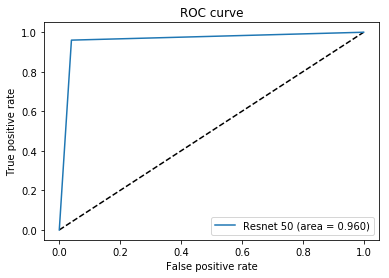

In [61]:
# Plot the graph
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Resnet 50 (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# Evaluation

In [ ]:
# evaluate on videos

In [ ]:
# frame the video
import cv2

def extract_video_frames(video_path):
    vidcap = cv2.VideoCapture(video_path)
    success, image = vidcap.read()
    count = 0
    while success:
        cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file      
        success,image = vidcap.read()
        print('Read a new frame: ', success)
        count += 1
        
VIDEO_DIR = r'C:\Users\wiqwe\Desktop\上交科研\selected_positive_#1_imgs'
VIDEO_FRAME_DIR = 

# Appendix -- keras Resnet definition

In [8]:
from __future__ import division

import six

from keras.models import Model

from keras.layers import (

    Input,

    Activation,

    Dense,

    Flatten

)

from keras.layers.convolutional import (

    Conv2D,

    MaxPooling2D,

    AveragePooling2D

)

from keras.layers.merge import add

from keras.layers.normalization import BatchNormalization

from keras.regularizers import l2

from keras import backend as K





def _bn_relu(input):

    """Helper to build a BN -> relu block

    """

    norm = BatchNormalization(axis=CHANNEL_AXIS)(input)

    return Activation("relu")(norm)





def _conv_bn_relu(**conv_params):

    """Helper to build a conv -> BN -> relu block

    """

    filters = conv_params["filters"]

    kernel_size = conv_params["kernel_size"]

    strides = conv_params.setdefault("strides", (1, 1))

    kernel_initializer = conv_params.setdefault("kernel_initializer", "he_normal")

    padding = conv_params.setdefault("padding", "same")

    kernel_regularizer = conv_params.setdefault("kernel_regularizer", l2(1.e-3))



    def f(input):

        conv = Conv2D(filters=filters, kernel_size=kernel_size,

                      strides=strides, padding=padding,

                      kernel_initializer=kernel_initializer,

                      kernel_regularizer=kernel_regularizer)(input)

        return _bn_relu(conv)



    return f





def _bn_relu_conv(**conv_params):

    """Helper to build a BN -> relu -> conv block.

    This is an improved scheme proposed in http://arxiv.org/pdf/1603.05027v2.pdf

    """

    filters = conv_params["filters"]

    kernel_size = conv_params["kernel_size"]

    strides = conv_params.setdefault("strides", (1, 1))

    kernel_initializer = conv_params.setdefault("kernel_initializer", "he_normal")

    padding = conv_params.setdefault("padding", "same")

    kernel_regularizer = conv_params.setdefault("kernel_regularizer", l2(1.e-3))



    def f(input):

        activation = _bn_relu(input)

        return Conv2D(filters=filters, kernel_size=kernel_size,

                      strides=strides, padding=padding,

                      kernel_initializer=kernel_initializer,

                      kernel_regularizer=kernel_regularizer)(activation)



    return f





def _shortcut(input, residual):

    """Adds a shortcut between input and residual block and merges them with "sum"

    """

    # Expand channels of shortcut to match residual.

    # Stride appropriately to match residual (width, height)

    # Should be int if network architecture is correctly configured.

    input_shape = K.int_shape(input)

    residual_shape = K.int_shape(residual)

    stride_width = int(round(input_shape[ROW_AXIS] / residual_shape[ROW_AXIS]))

    stride_height = int(round(input_shape[COL_AXIS] / residual_shape[COL_AXIS]))

    equal_channels = input_shape[CHANNEL_AXIS] == residual_shape[CHANNEL_AXIS]



    shortcut = input

    # 1 X 1 conv if shape is different. Else identity.

    if stride_width > 1 or stride_height > 1 or not equal_channels:

        shortcut = Conv2D(filters=residual_shape[CHANNEL_AXIS],

                          kernel_size=(1, 1),

                          strides=(stride_width, stride_height),

                          padding="valid",

                          kernel_initializer="he_normal",

                          kernel_regularizer=l2(0.001))(input)



    return add([shortcut, residual])





def _residual_block(block_function, filters, repetitions, is_first_layer=False):

    """Builds a residual block with repeating bottleneck blocks.

    """

    def f(input):

        for i in range(repetitions):

            init_strides = (1, 1)

            if i == 0 and not is_first_layer:

                init_strides = (2, 2)

            input = block_function(filters=filters, init_strides=init_strides,

                                   is_first_block_of_first_layer=(is_first_layer and i == 0))(input)

        return input



    return f





def basic_block(filters, init_strides=(1, 1), is_first_block_of_first_layer=False):

    """Basic 3 X 3 convolution blocks for use on resnets with layers <= 34.

    Follows improved proposed scheme in http://arxiv.org/pdf/1603.05027v2.pdf

    """

    def f(input):



        if is_first_block_of_first_layer:

            # don't repeat bn->relu since we just did bn->relu->maxpool

            conv1 = Conv2D(filters=filters, kernel_size=(3, 3),

                           strides=init_strides,

                           padding="same",

                           kernel_initializer="he_normal",

                           kernel_regularizer=l2(1e-3))(input)

        else:

            conv1 = _bn_relu_conv(filters=filters, kernel_size=(3, 3),

                                  strides=init_strides)(input)



        residual = _bn_relu_conv(filters=filters, kernel_size=(3, 3))(conv1)

        return _shortcut(input, residual)



    return f





def bottleneck(filters, init_strides=(1, 1), is_first_block_of_first_layer=False):

    """Bottleneck architecture for > 34 layer resnet.

    Follows improved proposed scheme in http://arxiv.org/pdf/1603.05027v2.pdf



    Returns:

        A final conv layer of filters * 4

    """

    def f(input):



        if is_first_block_of_first_layer:

            # don't repeat bn->relu since we just did bn->relu->maxpool

            conv_1_1 = Conv2D(filters=filters, kernel_size=(1, 1),

                              strides=init_strides,

                              padding="same",

                              kernel_initializer="he_normal",

                              kernel_regularizer=l2(1e-3))(input)

        else:

            conv_1_1 = _bn_relu_conv(filters=filters, kernel_size=(1, 1),

                                     strides=init_strides)(input)



        conv_3_3 = _bn_relu_conv(filters=filters, kernel_size=(3, 3))(conv_1_1)

        residual = _bn_relu_conv(filters=filters * 4, kernel_size=(1, 1))(conv_3_3)

        return _shortcut(input, residual)



    return f





def _handle_dim_ordering():

    global ROW_AXIS

    global COL_AXIS

    global CHANNEL_AXIS

    if K.image_dim_ordering() == 'tf':

        ROW_AXIS = 1

        COL_AXIS = 2

        CHANNEL_AXIS = 3

    else:

        CHANNEL_AXIS = 1

        ROW_AXIS = 2

        COL_AXIS = 3





def _get_block(identifier):

    if isinstance(identifier, six.string_types):

        res = globals().get(identifier)

        if not res:

            raise ValueError('Invalid {}'.format(identifier))

        return res

    return identifier





class ResnetBuilder(object):

    @staticmethod

    def build(input_shape, num_outputs, block_fn, repetitions):

        """Builds a custom ResNet like architecture.



        Args:

            input_shape: The input shape in the form (nb_channels, nb_rows, nb_cols)

            num_outputs: The number of outputs at final softmax layer

            block_fn: The block function to use. This is either `basic_block` or `bottleneck`.

                The original paper used basic_block for layers < 50

            repetitions: Number of repetitions of various block units.

                At each block unit, the number of filters are doubled and the input size is halved



        Returns:

            The keras `Model`.

        """

        _handle_dim_ordering()

        if len(input_shape) != 3:

            raise Exception("Input shape should be a tuple (nb_channels, nb_rows, nb_cols)")



        # Permute dimension order if necessary

        if K.image_dim_ordering() == 'tf':

            input_shape = (input_shape[1], input_shape[2], input_shape[0])



        # Load function from str if needed.

        block_fn = _get_block(block_fn)



        input = Input(shape=input_shape)

        conv1 = _conv_bn_relu(filters=64, kernel_size=(7, 7), strides=(2, 2))(input)

        pool1 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding="same")(conv1)



        block = pool1

        filters = 64

        for i, r in enumerate(repetitions):

            block = _residual_block(block_fn, filters=filters, repetitions=r, is_first_layer=(i == 0))(block)

            filters *= 2



        # Last activation

        block = _bn_relu(block)



        # Classifier block

        block_shape = K.int_shape(block)

        pool2 = AveragePooling2D(pool_size=(block_shape[ROW_AXIS], block_shape[COL_AXIS]),

                                 strides=(1, 1))(block)

        flatten1 = Flatten()(pool2)

        dense = Dense(units=num_outputs, kernel_initializer="he_normal",

                      activation="softmax")(flatten1)



        model = Model(inputs=input, outputs=dense)

        return model



    @staticmethod

    def build_resnet_18(input_shape, num_outputs):

        return ResnetBuilder.build(input_shape, num_outputs, basic_block, [2, 2, 2, 2])



    @staticmethod

    def build_resnet_34(input_shape, num_outputs):

        return ResnetBuilder.build(input_shape, num_outputs, basic_block, [3, 4, 6, 3])



    @staticmethod

    def build_resnet_50(input_shape, num_outputs):

        return ResnetBuilder.build(input_shape, num_outputs, bottleneck, [3, 4, 6, 3])



    @staticmethod

    def build_resnet_101(input_shape, num_outputs):

        return ResnetBuilder.build(input_shape, num_outputs, bottleneck, [3, 4, 23, 3])



    @staticmethod

    def build_resnet_152(input_shape, num_outputs):

        return ResnetBuilder.build(input_shape, num_outputs, bottleneck, [3, 8, 36, 3])

Using TensorFlow backend.
